In [1]:
#step two of midterm
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np
pyLDAvis.enable_notebook()

#import dataset
from sklearn.datasets import fetch_20newsgroups
#import functions to analyze the __ and the relative weighted term freq of words in a doc (TFIDF)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import LDA stuff
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
#load variables from prefin notebook
%store -r newsgroup

In [3]:
#the term frequency vectorizer returns an M(document number in rows) BY N(count of every possible word in col) matrix of term frequency
#min and max df (doc freq) are set to select thresholds of which words to include in the tf matrix
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 10 means "ignore terms that appear in fewer than 10 documents".
# this gets rid of words like "the", "and" (thanks to max_df) 
# also removes words like "supercalifragalisticexpialidocious" which may only appear in one or two articles and thus is not important to consider
# searches for alphanumeric of three or more letters


#start with vectorizer for larger vocabulary 
countVec1 = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

In [4]:
#bow matrices
bow_large = countVec1.fit_transform(newsgroup.data)

In [5]:
#tfidf vectorizers
tfidf____large = TfidfVectorizer(**countVec1.get_params())

In [6]:
#tfidf matrices
tfidf_large = tfidf____large.fit_transform(newsgroup.data)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1577: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [7]:
#set the number of distince topics we want our LDA classifier to extract
num_topics = 6

#large vocab
#now, set up LDA to obtain a matrix with TxW (topics(6)) by (words) with the estimated probabilities 
lda_large = LatentDirichletAllocation(n_components=num_topics, random_state=0, max_iter=100, verbose=1)

#fit the lda model to our document term matrix (TF-IDF matrix) of large vocab
lda_large.fit(np.transpose(tfidf_large))

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=6, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [8]:
#tfidf_large has matrix of docsXwords
#The shape (docs,words) of the large tfidf matrix is  (18846, 12725)
#want LDA to return a docsXtopics matrix

In [9]:
lda_large

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=6, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [10]:
lda_large.components_

array([[0.16674766, 0.16666992, 1.76865782, ..., 0.16672036, 0.16668206,
        0.16671034],
       [0.16667336, 0.16670917, 0.16668906, ..., 0.16672407, 0.16668323,
        0.16676088],
       [0.16789458, 5.04061992, 0.16761646, ..., 3.91928938, 0.16953736,
        0.16964673],
       [3.12321553, 0.16780826, 6.59899398, ..., 0.28224317, 4.15162464,
        8.7412452 ],
       [2.83104567, 0.16666869, 0.1672402 , ..., 0.16703707, 0.16739976,
        0.16719922],
       [0.16669946, 0.16667442, 0.1666889 , ..., 0.16672542, 0.16669649,
        0.16679821]])

In [11]:
len(np.transpose(lda_large.components_))
#lda_large.components_ is a 6 down by 18846 across matrix of probabilities 

18846

In [12]:
#array should be samples going down, dimensions going across
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X = np.transpose(lda_large.components_)

In [14]:
twoDimLDAdocVecs = pca.fit_transform(X)

In [15]:
twoDimLDAdocVecs
#18,846 by 2 matrix

array([[ 0.46623567, -1.8596796 ],
       [-4.50596623,  1.25431608],
       [ 3.49870799,  0.17936419],
       ...,
       [-3.85454906,  0.34264857],
       [ 1.35906325, -1.00514794],
       [ 5.3543806 ,  1.23365901]])

In [16]:
#K means for LDA
#Now Use KMEANS
from sklearn.cluster import KMeans

In [17]:
twoDimLDAdocVecs = np.transpose(twoDimLDAdocVecs)

In [18]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(np.transpose(twoDimLDAdocVecs))

In [19]:
kMeanCentersD2V = kmeans.cluster_centers_

In [20]:
kMeanCentersD2V

array([[-4.82312099,  2.62428244],
       [ 7.31226335,  2.44316103],
       [-1.65306654, -2.44902141],
       [ 1.17013099, -0.92975777],
       [ 3.57238561,  0.33057849],
       [-3.6047264 ,  0.29545179]])

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplc

In [22]:
y = newsgroup.target
len(y)

18846

In [23]:
# 6 colors
colormap = np.array([
    "#f44b42", "#f4e241", "#a3f441", "#41f4be", "#4182f4",
    "#a341f4"])

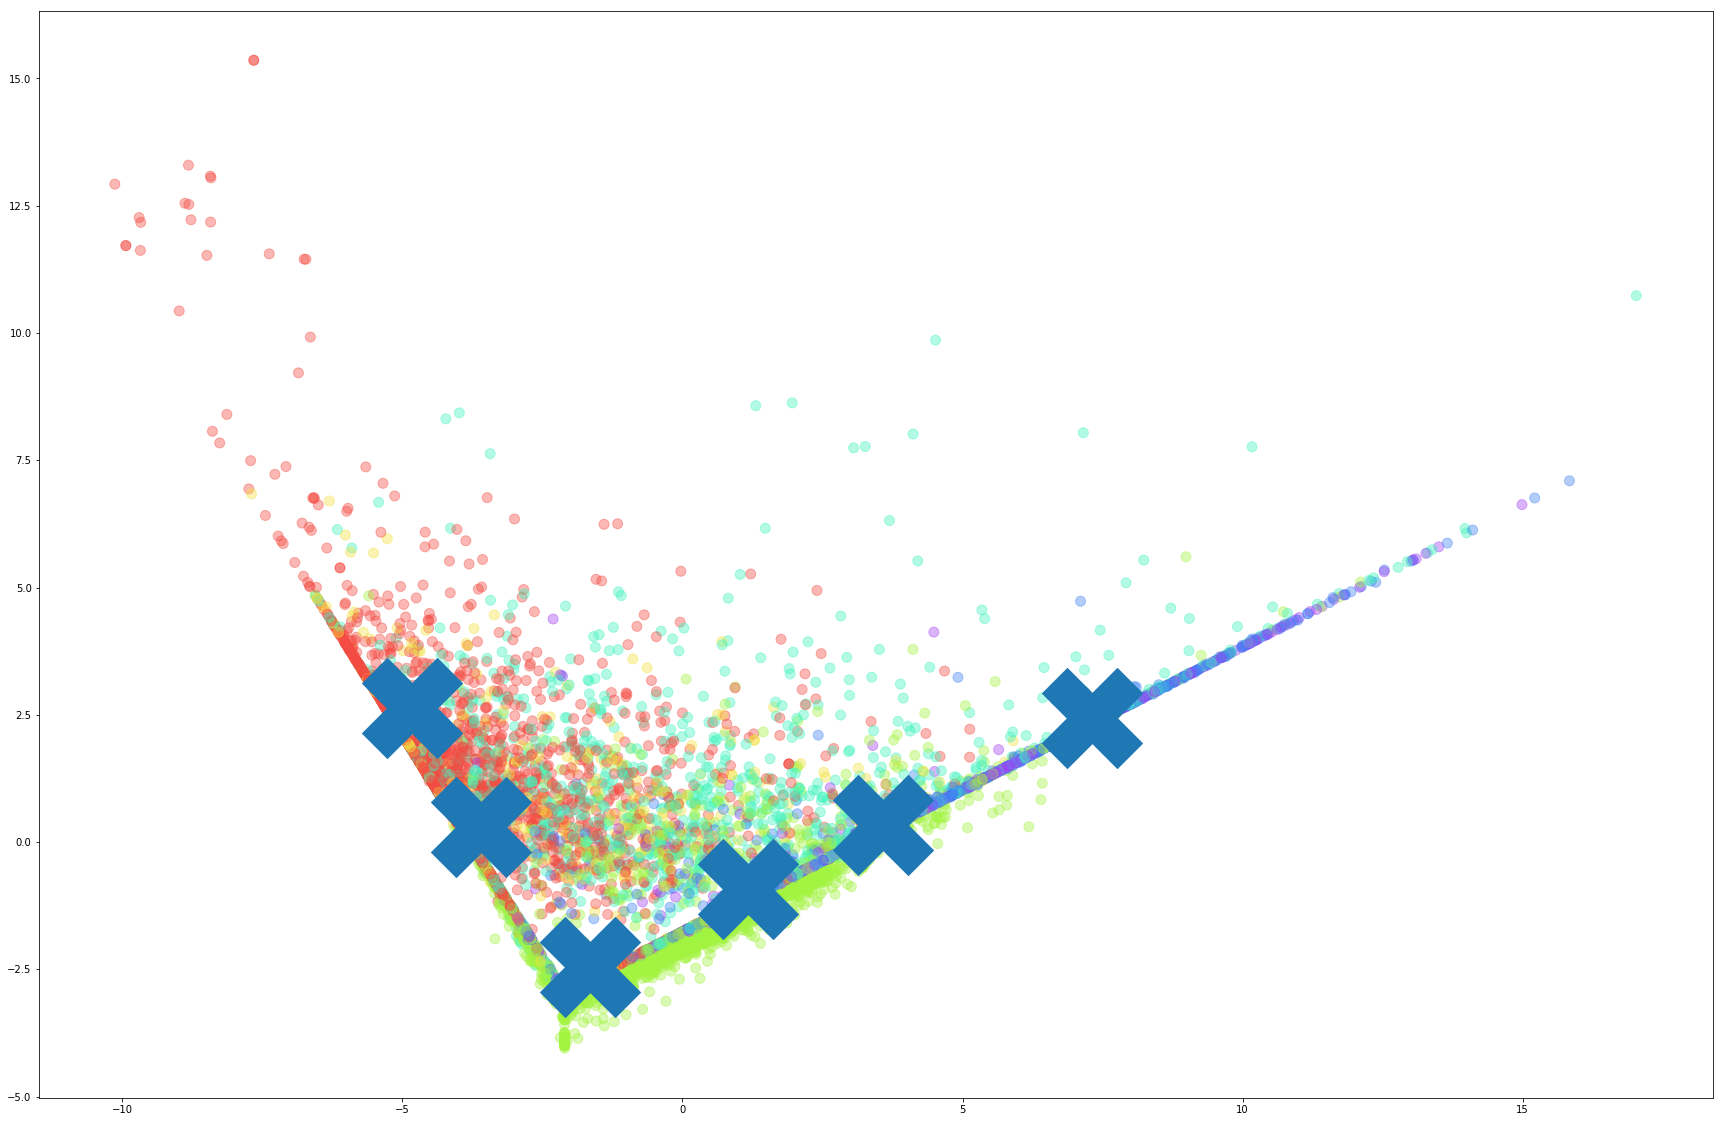

In [24]:
plt.figure(2, figsize=(30, 20),)
plt.scatter(twoDimLDAdocVecs[0], twoDimLDAdocVecs[1],s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.4)
plt.scatter(kMeanCentersD2V[:, 0],kMeanCentersD2V[:, 1],marker='X',s=10000)

In [25]:
from sklearn.metrics import normalized_mutual_info_score

In [26]:
a = kmeans.predict(np.transpose(twoDimLDAdocVecs))

In [27]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.21295566249754255

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [75]:
pca3 = PCA(n_components=3)
X = np.transpose(lda_large.components_)
threeDimLDAdocVecs = pca3.fit_transform(X)


In [76]:
threeDimLDAdocVecs = np.transpose(threeDimLDAdocVecs)

In [77]:
kmeans3 = KMeans(n_clusters=6, random_state=0).fit(np.transpose(threeDimLDAdocVecs))
kMeanCenters3 = kmeans3.cluster_centers_

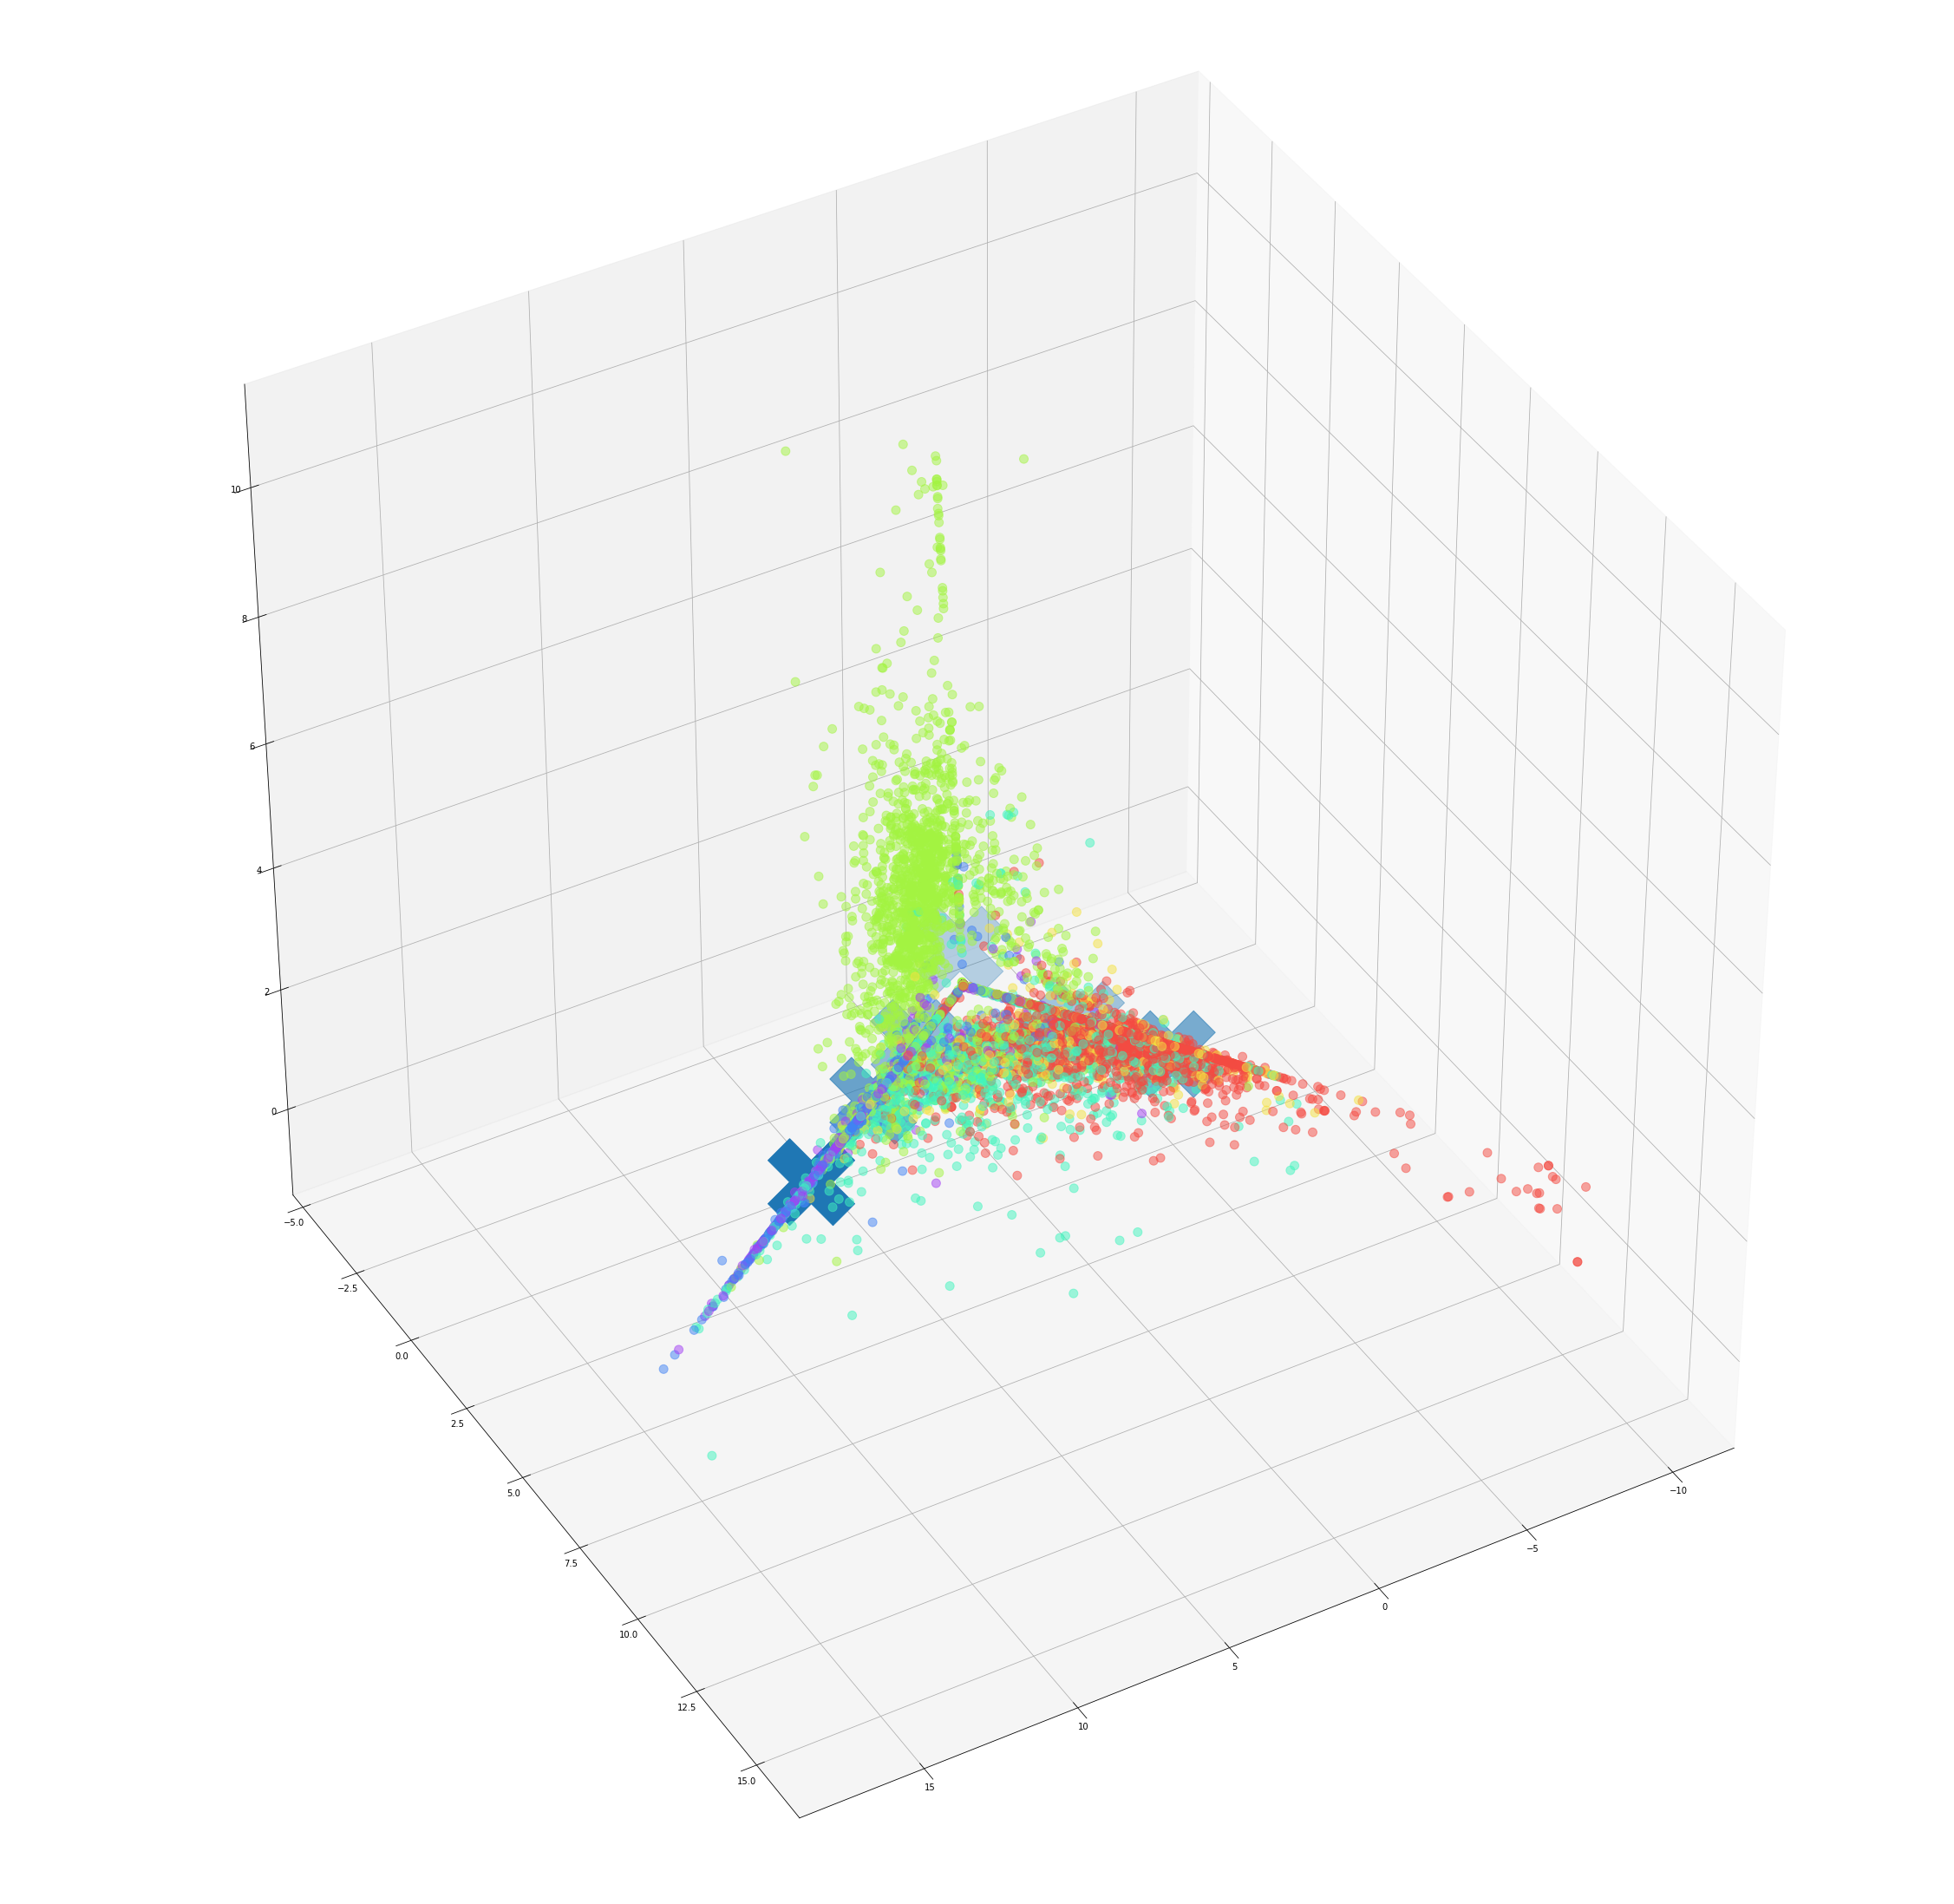

In [93]:
#fig = plt.figure()
fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(threeDimLDAdocVecs[0], threeDimLDAdocVecs[1], threeDimLDAdocVecs[2], 
           s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.5)
ax.scatter(kMeanCenters3[:, 0],kMeanCenters3[:, 1],kMeanCenters3[:, 2],marker='X',s=10000)
ax.view_init(40, 60)

In [94]:
a = kmeans3.predict(np.transpose(threeDimLDAdocVecs))

In [95]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.214609833081717

In [98]:
#kmeans for bow now
#motivation
#get the documentXword count matrix
bow_large
#18846x12725 sparse matrix
#
# PCA to find 2 PCs and try to find some separation
#
#
#
from sklearn.decomposition import TruncatedSVD

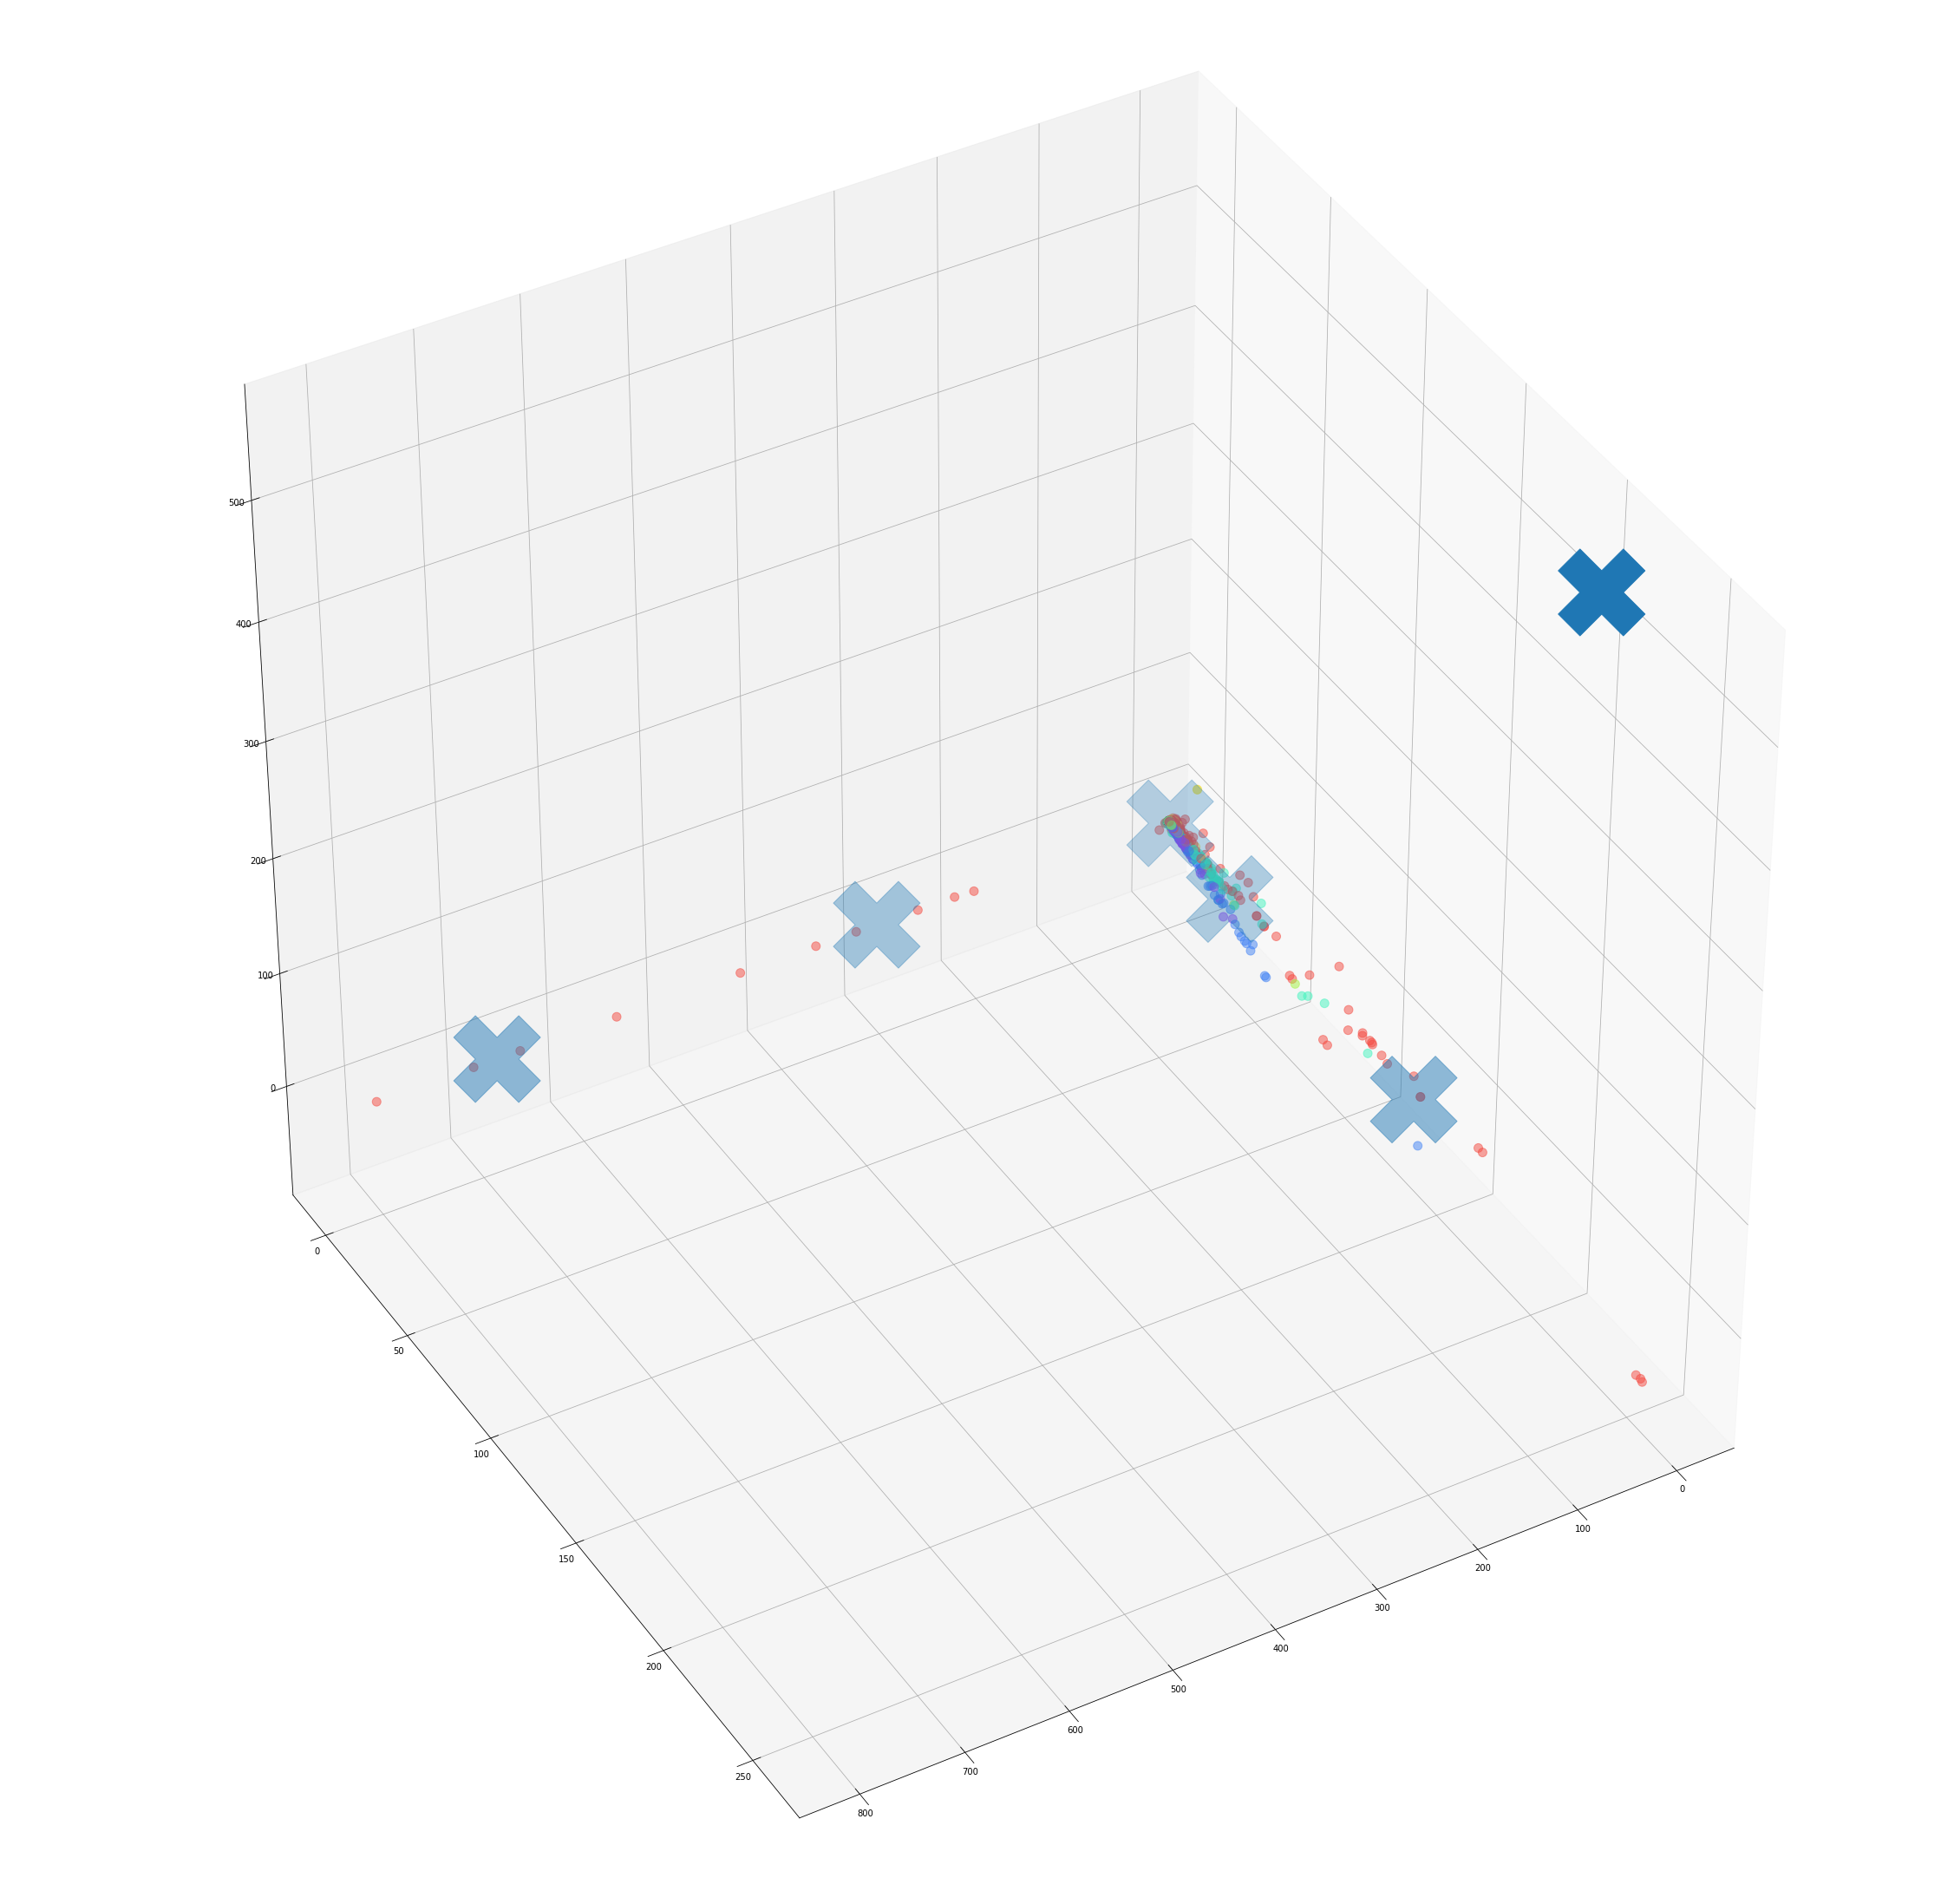

In [104]:
#PCA needs docs down by other stuff across
#
svd = TruncatedSVD(n_components=3, n_iter=500)
threeDVecs = svd.fit_transform(bow_large)
#18862 by 3
#
_3dDocVecsBOW = np.transpose(threeDVecs)

kmeans3 = KMeans(n_clusters=6, random_state=0).fit(np.transpose(_3dDocVecsBOW))
kMeanCenters3 = kmeans3.cluster_centers_


#fig = plt.figure()
fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(_3dDocVecsBOW[0], _3dDocVecsBOW[1], _3dDocVecsBOW[2], 
           s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.5)
ax.scatter(kMeanCenters3[:, 0],kMeanCenters3[:, 1],kMeanCenters3[:, 2],marker='X',s=10000)
ax.view_init(40, 60)


a = kmeans3.predict(np.transpose(threeDimLDAdocVecs))

In [108]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.21295566249754255

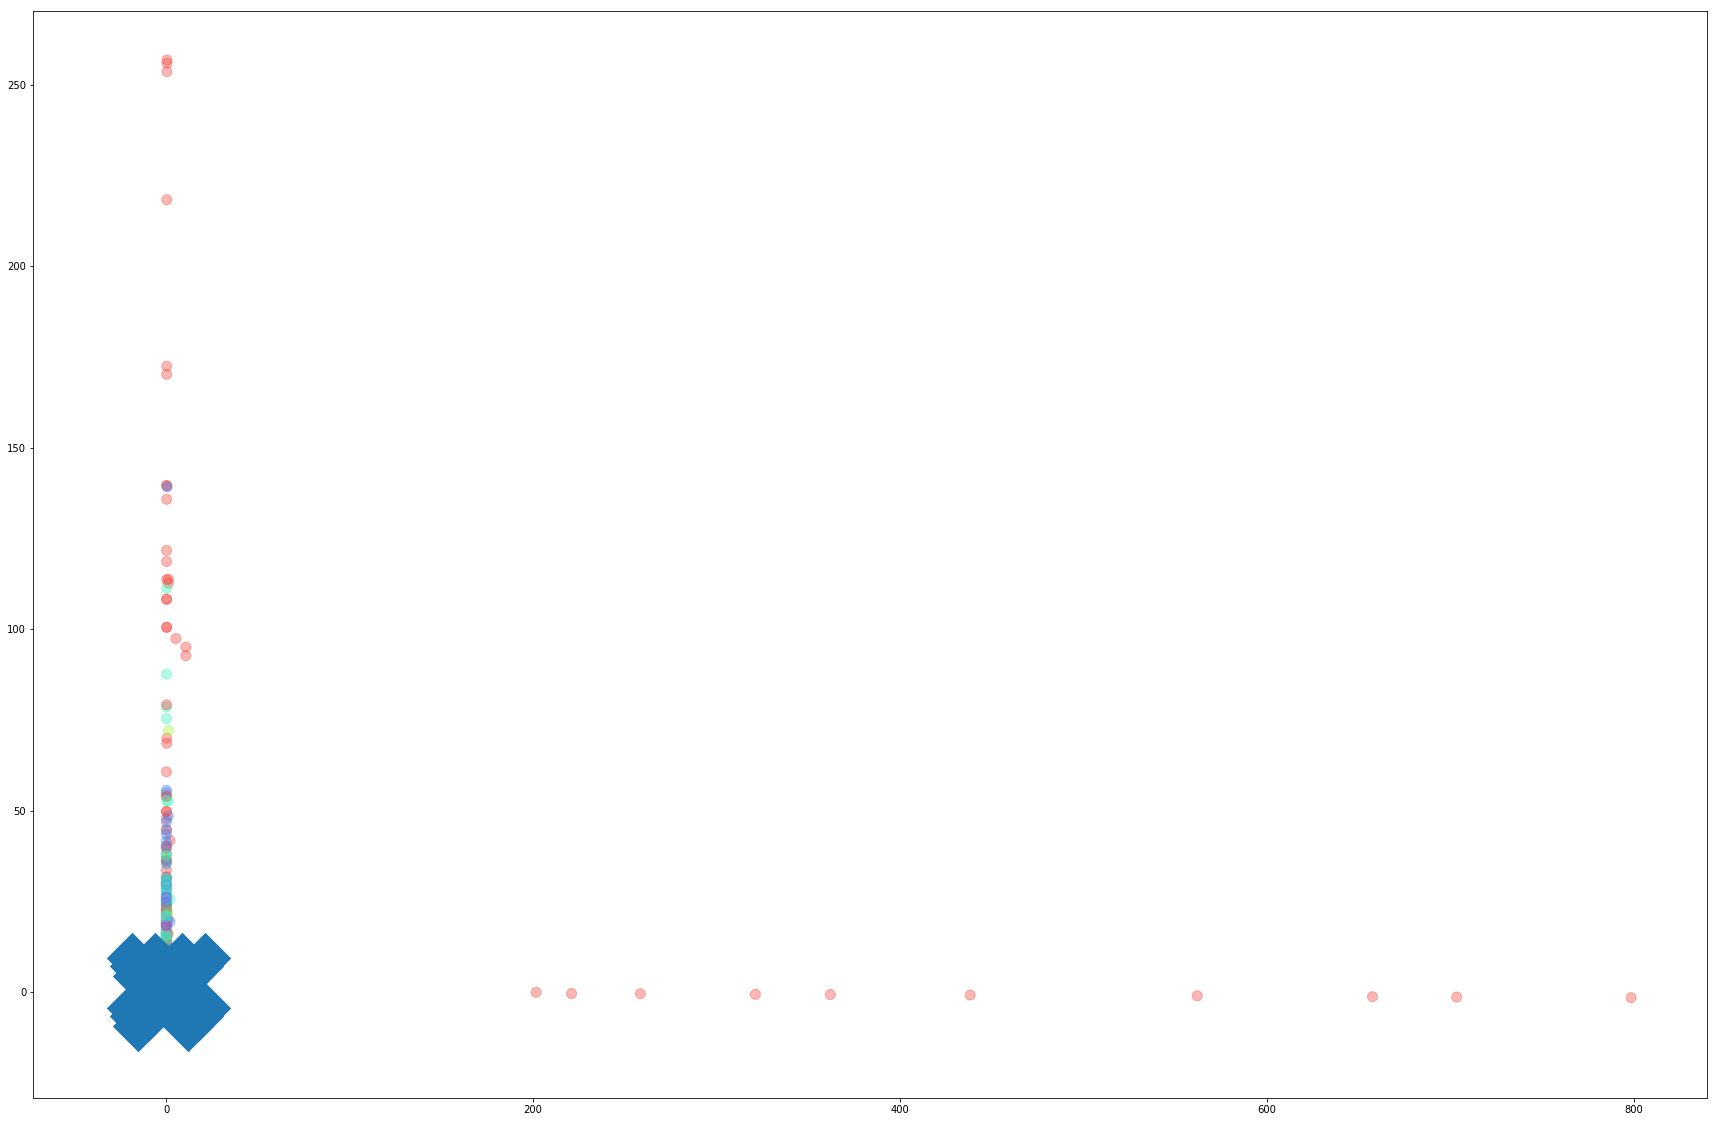

In [106]:
svd = TruncatedSVD(n_components=2, n_iter=500)
twoDVecs = svd.fit_transform(bow_large)
#18862 by 2
#
_2dDocVecsBOW = np.transpose(twoDVecs)

kmeans3 = KMeans(n_clusters=6, random_state=0).fit(np.transpose(_2dDocVecsBOW))
kMeanCenters3 = kmeans3.cluster_centers_


plt.figure(2, figsize=(30, 20),)
plt.scatter(_2dDocVecsBOW[0], _2dDocVecsBOW[1],s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.4)
plt.scatter(kMeanCentersD2V[:, 0],kMeanCentersD2V[:, 1],marker='X',s=10000)
a = kmeans.predict(np.transpose(twoDimLDAdocVecs))

In [107]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.21295566249754255

In [111]:
len(y)

18846

In [109]:
#Kmeans for tfidf now!
tfidf_large

<18846x12725 sparse matrix of type '<class 'numpy.float64'>'
	with 931621 stored elements in Compressed Sparse Row format>

In [126]:
#SVD needs docs down by other stuff across
#
svd_tfidf = TruncatedSVD(n_components=3, n_iter=500)
threeDVecs_tfidf = svd_tfidf.fit_transform(tfidf_large)
#18862 by 3
#
_3dDocVecstfidf = np.transpose(threeDVecs_tfidf)

kmeans3tfidf = KMeans(n_clusters=6, random_state=0,max_iter=5000).fit(np.transpose(_3dDocVecstfidf))
kMeanCenters3tfidf = kmeans3tfidf.cluster_centers_




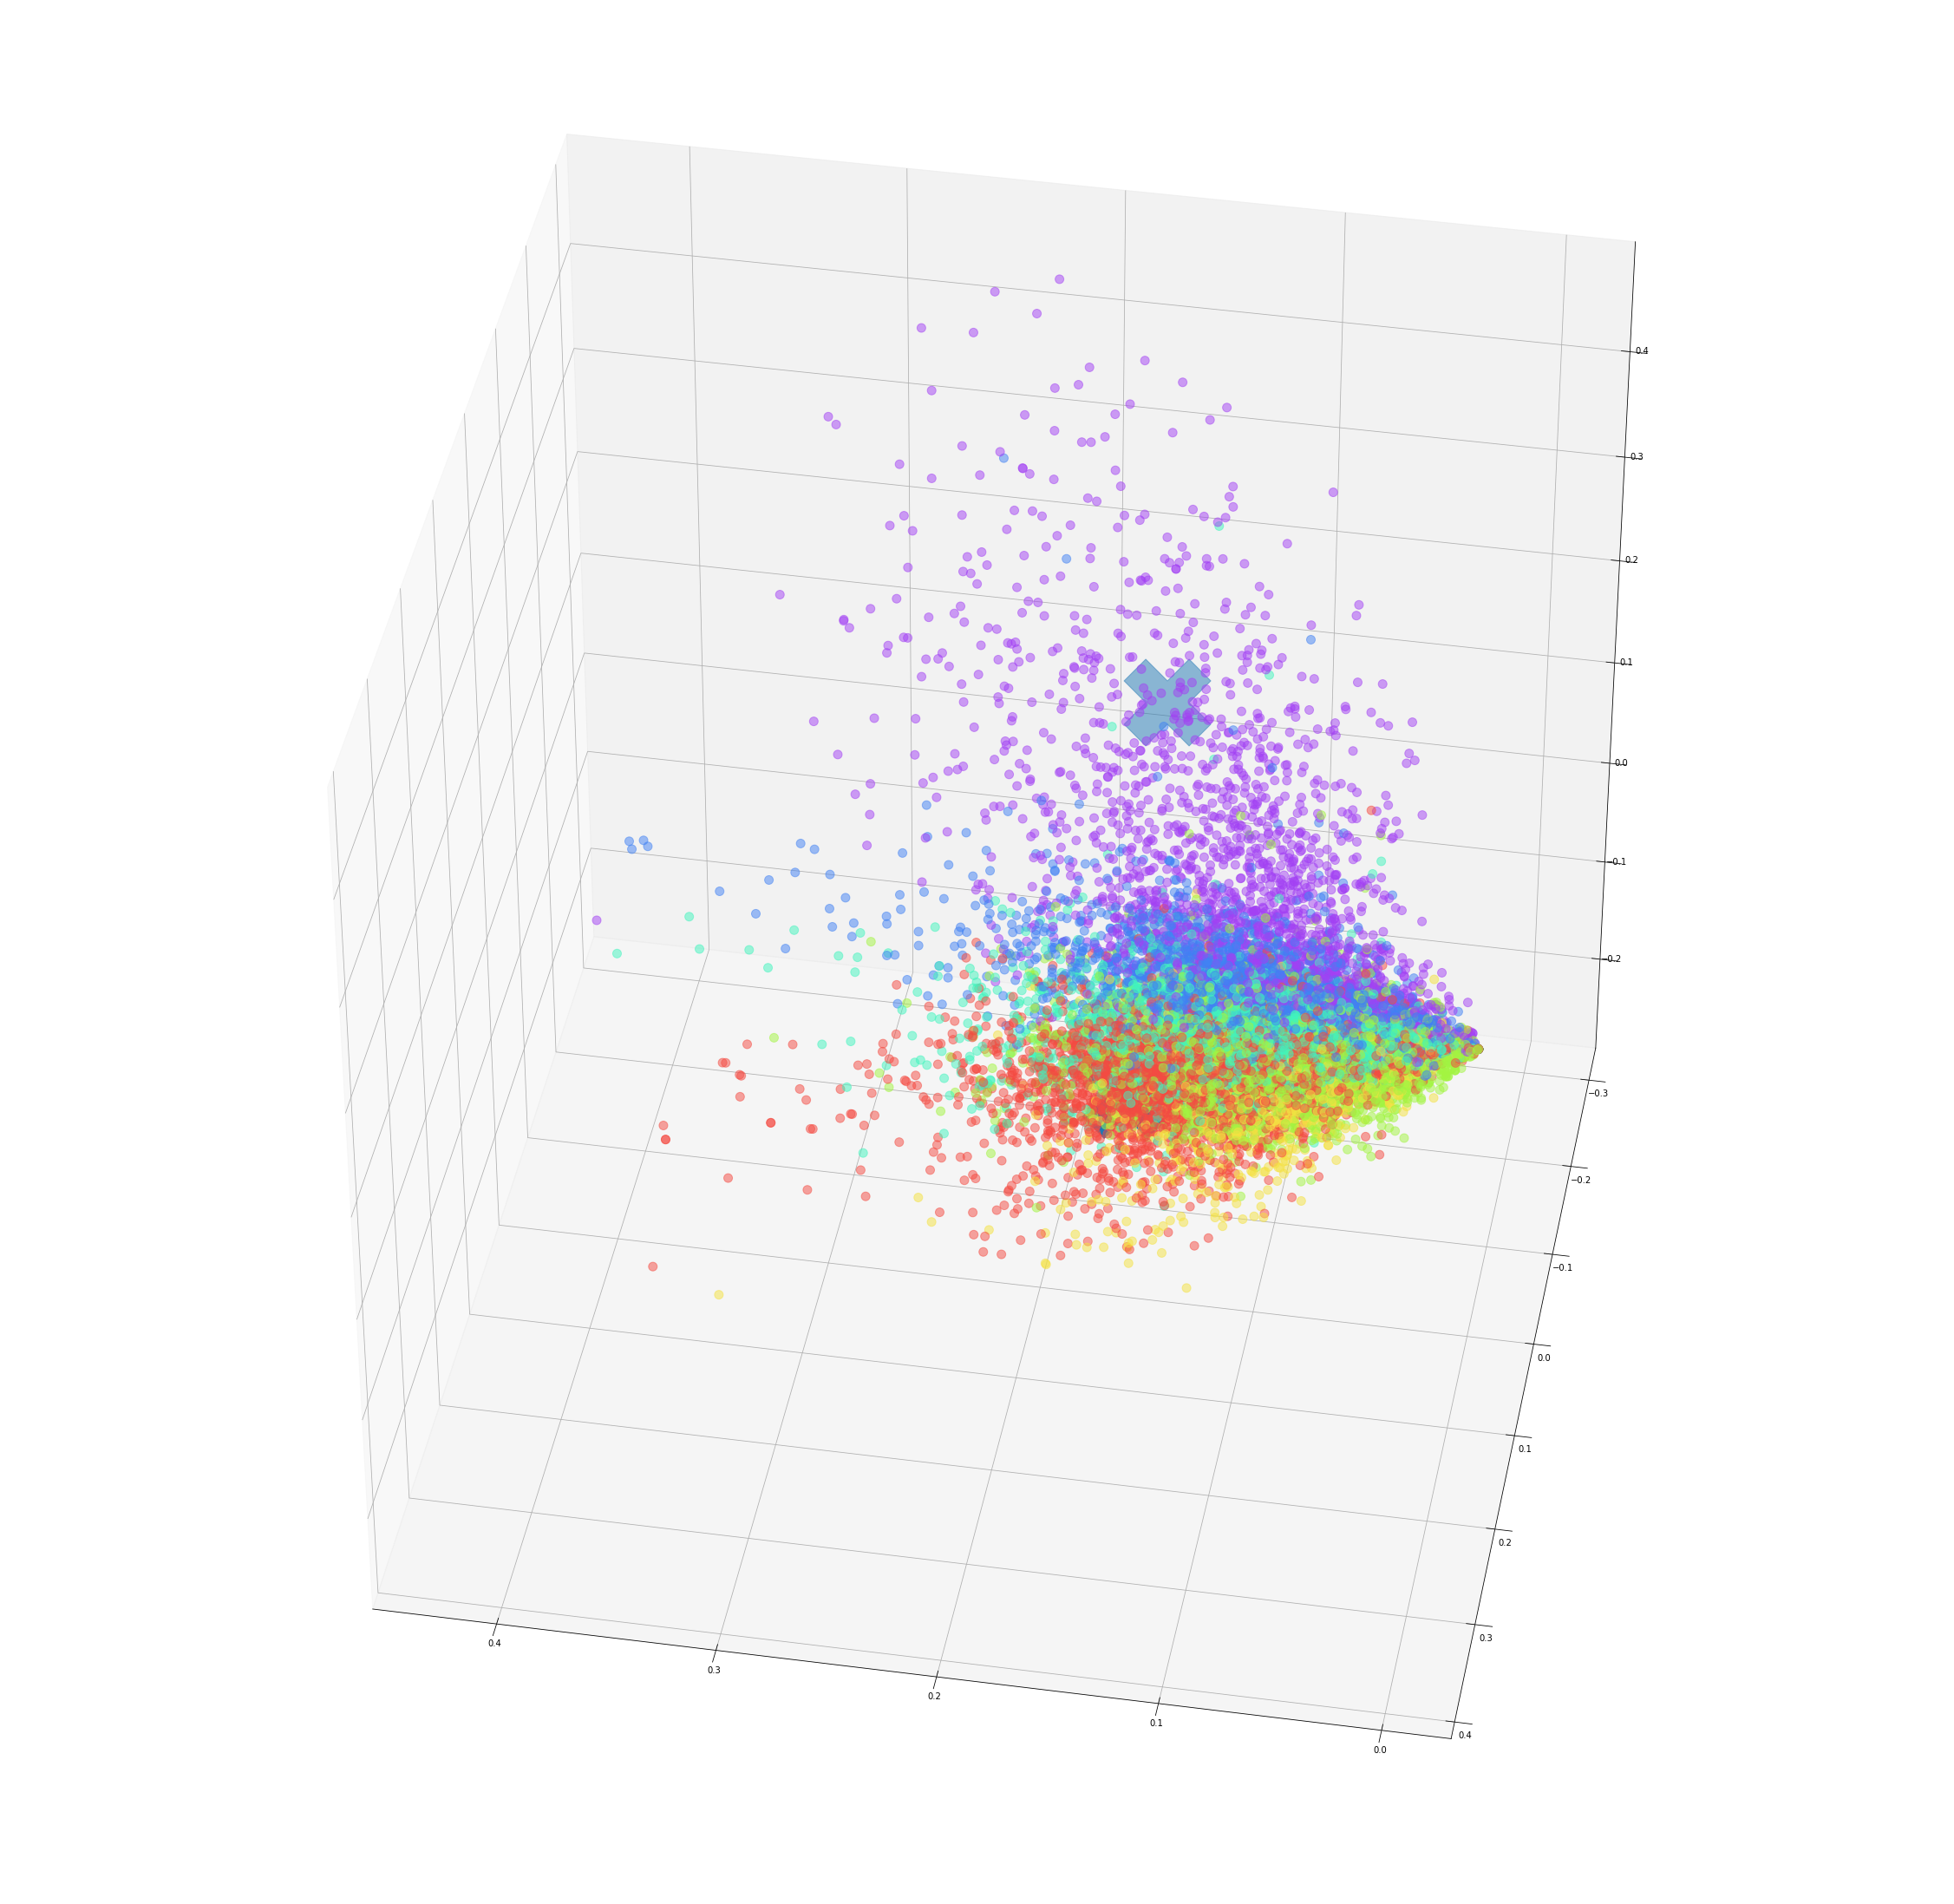

In [127]:
#fig = plt.figure()
fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(_3dDocVecstfidf[0], _3dDocVecstfidf[1], _3dDocVecstfidf[2], 
           s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.5)
ax.scatter(kMeanCenters3tfidf[:, 0],kMeanCenters3tfidf[:, 1],kMeanCenters3tfidf[:, 2],marker='X',s=10000)
ax.view_init(40, 100)


a = kmeans3tfidf.predict(np.transpose(threeDimLDAdocVecs))

In [128]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.19451723322356793

In [129]:
kMeanCenters3tfidf

array([[ 0.11720674, -0.02128999, -0.05148674],
       [ 0.10128771,  0.05830473,  0.00481856],
       [ 0.15819409, -0.14246714,  0.18029757],
       [ 0.04975561, -0.00885826, -0.00888569],
       [ 0.14524487, -0.07287736,  0.0032437 ],
       [ 0.14599443,  0.14153611,  0.04571229]])

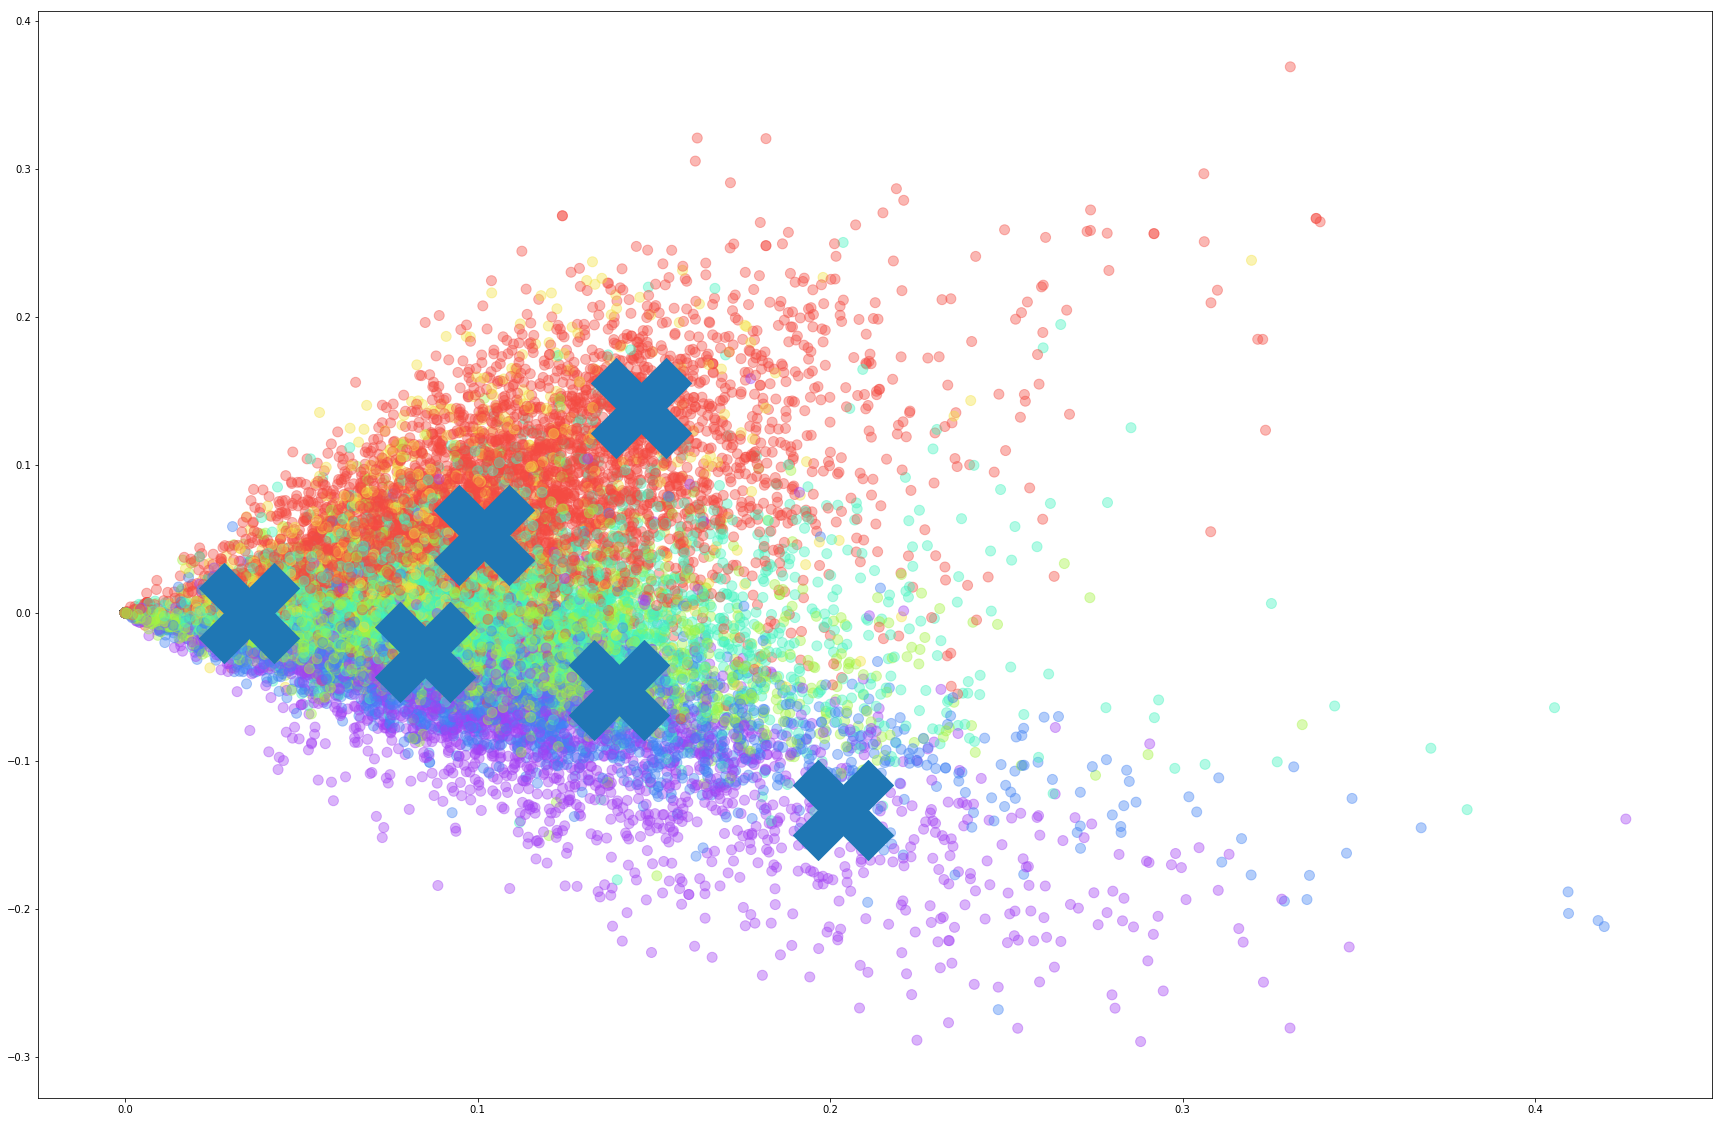

In [134]:
svd = TruncatedSVD(n_components=2, n_iter=500)
twoDVecs = svd.fit_transform(tfidf_large)
#18862 by 2
#
_2dDocVecsBOW = np.transpose(twoDVecs)

kmeans3 = KMeans(n_clusters=6, random_state=0,max_iter=500).fit(np.transpose(_2dDocVecsBOW))
kMeanCenters3 = kmeans3.cluster_centers_


plt.figure(2, figsize=(30, 20),)
plt.scatter(_2dDocVecsBOW[0], _2dDocVecsBOW[1],s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.4)
plt.scatter(kMeanCenters3[:, 0],kMeanCenters3[:, 1],marker='X',s=10000)
a = kmeans.predict(np.transpose(twoDimLDAdocVecs))

In [135]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.21295566249754255